#Diabetes Classification
___
By: Hossam Farhoud

### **Importing necessary libraries**


In [47]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score




## **Loading the dataset**

In [48]:

data = pd.read_csv('/content/diabetes.csv')  # Load the diabetes dataset
print(data.head())  # Display the first few rows of the dataset



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## **Exploring the dataset**

In [49]:
print("\nDataset Info:")
data.info()  # Print information about the dataset




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Checking for missing values**

In [50]:
print("\nNull Values in the Dataset:")
data_nulls = dict(data.isna().sum())
print(data_nulls)




Null Values in the Dataset:
{'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 0}


## **Displaying data types of columns**

In [51]:
print("\nColumn Data Types:")
column_types = {k: str(v) for k, v in zip(data.dtypes.index, data.dtypes.values)}
print(column_types)



Column Data Types:
{'Pregnancies': 'int64', 'Glucose': 'int64', 'BloodPressure': 'int64', 'SkinThickness': 'int64', 'Insulin': 'int64', 'BMI': 'float64', 'DiabetesPedigreeFunction': 'float64', 'Age': 'int64', 'Outcome': 'int64'}


##**Visualizing the distribution of the target variable**


Boxplot for the 'Outcome' column:


<Axes: >

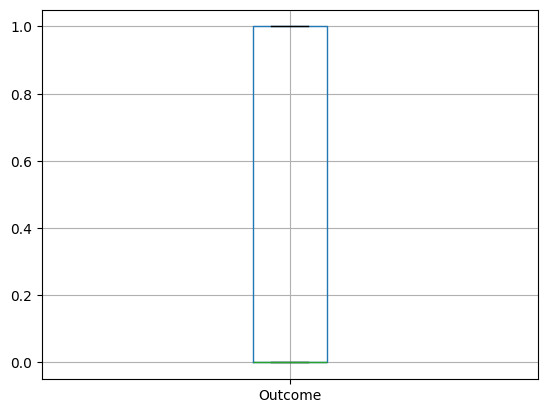

In [52]:

print("\nBoxplot for the 'Outcome' column:")
data.boxplot('Outcome')


##**Correlation Heatmap**
___
*   to show correlations between features to understand relationships.




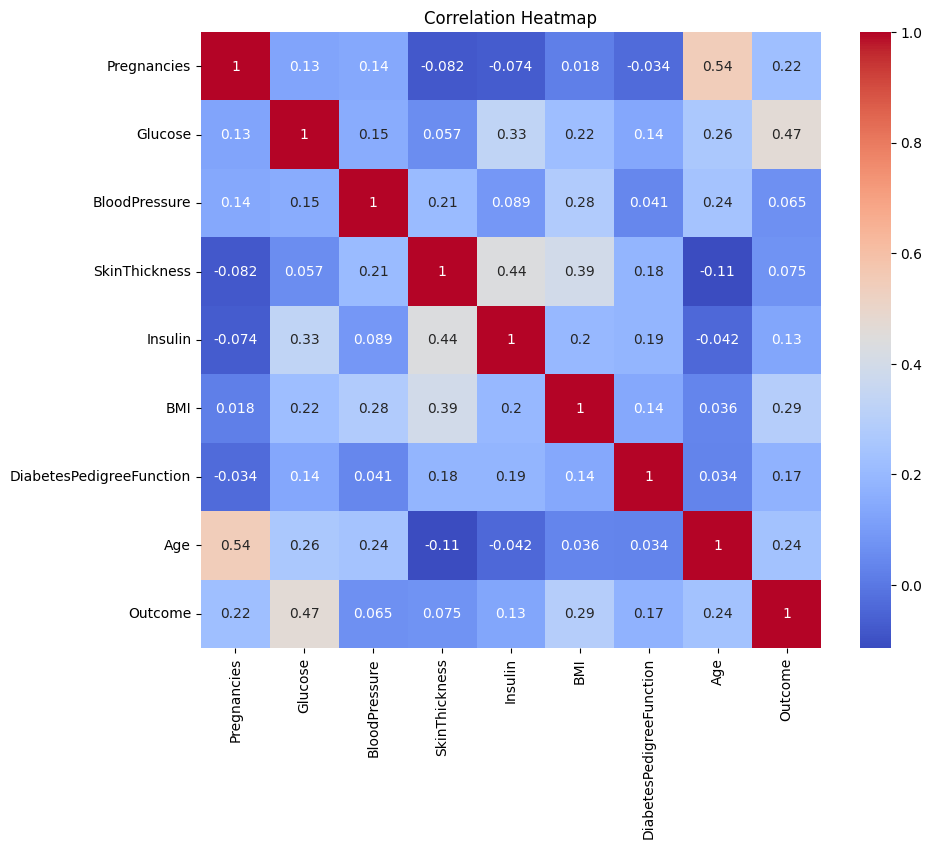

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##**Data Distribution Plots**
___
*   Use histograms or density plots to visualize the distribution of numerical features like Glucose, BloodPressure, and BMI.




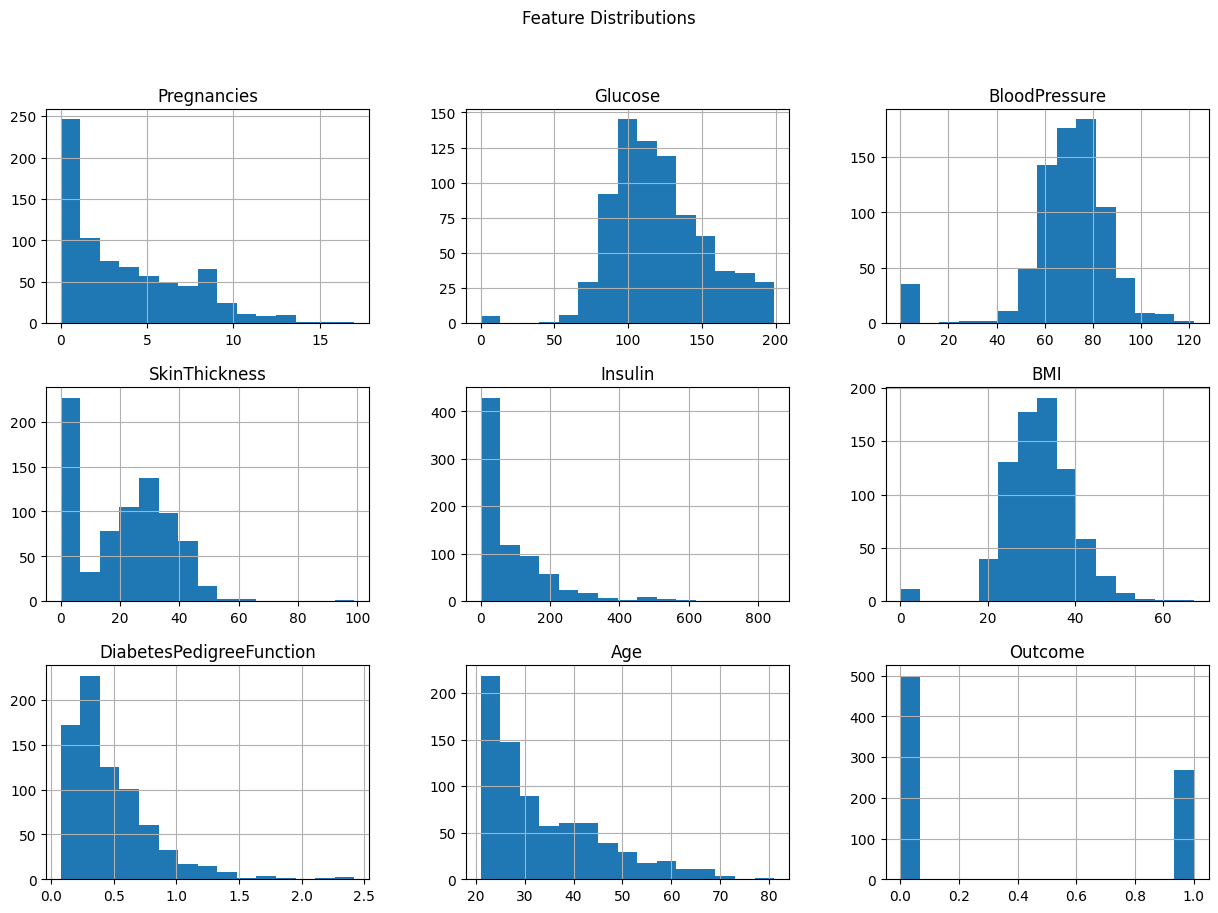

In [54]:
import matplotlib.pyplot as plt
data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


### **Separating features and target variable**

In [55]:
X = data.drop(['Outcome'], axis=1)  # Features
y = data['Outcome']  # Target variable

##**Standardizing the features**

In [56]:

print("\nStandardizing the features...")
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)


Standardizing the features...


### **Splitting the dataset into training and testing sets**

In [57]:

print("\nSplitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=44, shuffle=True
)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


Splitting the data into training and testing sets...
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## **Applying Logistic Regression model**

In [58]:
print("\nTraining the Logistic Regression Model...")
logistic_model = LogisticRegression(penalty='l2', solver='sag', C=1.0, random_state=33)
logistic_model.fit(X_train, y_train)


Training the Logistic Regression Model...


LogisticRegression(random_state=33, solver='sag')

## **Evaluating the model**

In [59]:
print("\nModel Evaluation:")
print('Train Score:', logistic_model.score(X_train, y_train))
print('Test Score:', logistic_model.score(X_test, y_test))
print('Model Classes:', logistic_model.classes_)
print('Number of Iterations:', logistic_model.n_iter_)


Model Evaluation:
Train Score: 0.7768729641693811
Test Score: 0.8051948051948052
Model Classes: [0 1]
Number of Iterations: [25]


## **Making predictions**

In [60]:
print("\nMaking Predictions:")
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)
print('First 10 Predicted Values:', y_pred[:10])
print('First 10 Prediction Probabilities:', y_pred_prob[:10])


Making Predictions:
First 10 Predicted Values: [0 1 1 0 1 1 0 0 0 0]
First 10 Prediction Probabilities: [[0.87195579 0.12804421]
 [0.13369239 0.86630761]
 [0.35007013 0.64992987]
 [0.85048155 0.14951845]
 [0.30966246 0.69033754]
 [0.38494422 0.61505578]
 [0.72206308 0.27793692]
 [0.93908137 0.06091863]
 [0.87053623 0.12946377]
 [0.69713537 0.30286463]]


##**Calculating evaluation metrics**

In [61]:
print("\nEvaluation Metrics:")
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('Accuracy Score:', accuracy)


Evaluation Metrics:
Precision Score: 0.925
Recall Score: 0.578125
Accuracy Score: 0.8051948051948052


## **Making a prediction for a single input**

In [62]:
input_data = (0,189,104,25,0,34.3,0.435,41)# New data to predict

# Define column names (same as in the dataset)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age'] # Column names

# Convert input_data into a DataFrame
input_data_as_dataframe = pd.DataFrame([input_data], columns=columns)

# Standardize the input data
std_data = scaler.transform(input_data_as_dataframe)  # Create a DataFrame for input
print(std_data)

# Make a prediction using the trained Logistic Regression model
prediction = logistic_model.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[-1.14185152  2.13150675  1.80396875  0.27998931 -0.69289057  0.29285624
  -0.11137081  0.66020563]]
[1]
The person is diabetic


##**Outcome Balance Visualization**
___

*   A bar plot to check the balance of the Outcome column (target variable).




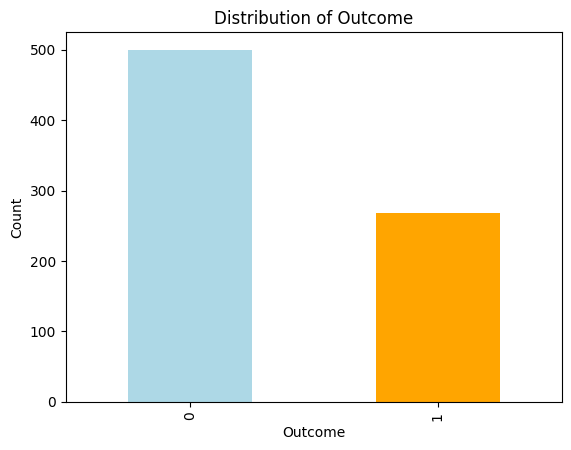

In [63]:
data['Outcome'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

###**Feature Importance**
___


*   Use bar plots to display feature importance for models that support it (e.g., Random Forest, Logistic Regression coefficients).




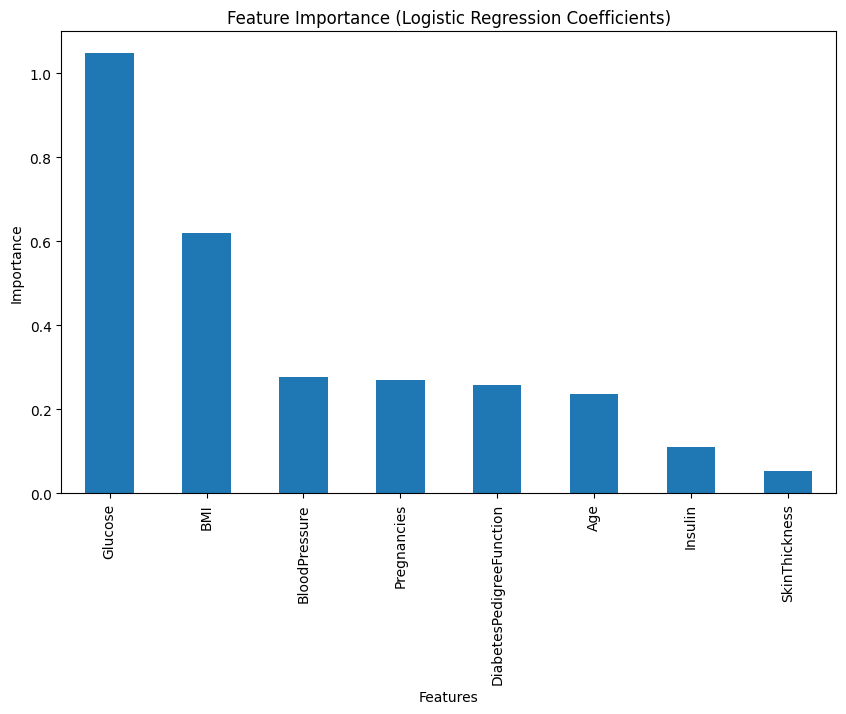

In [64]:
feature_importance = pd.Series(logistic_model.coef_[0], index=data.columns[:-1])
feature_importance = feature_importance.abs().sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
